In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train['label_2'].fillna(train['label_2'].mean(), inplace=True)

In [4]:
train['label_2'] = train['label_2'].astype(int)

In [5]:
train.dropna(subset=['label_4'], inplace=True)

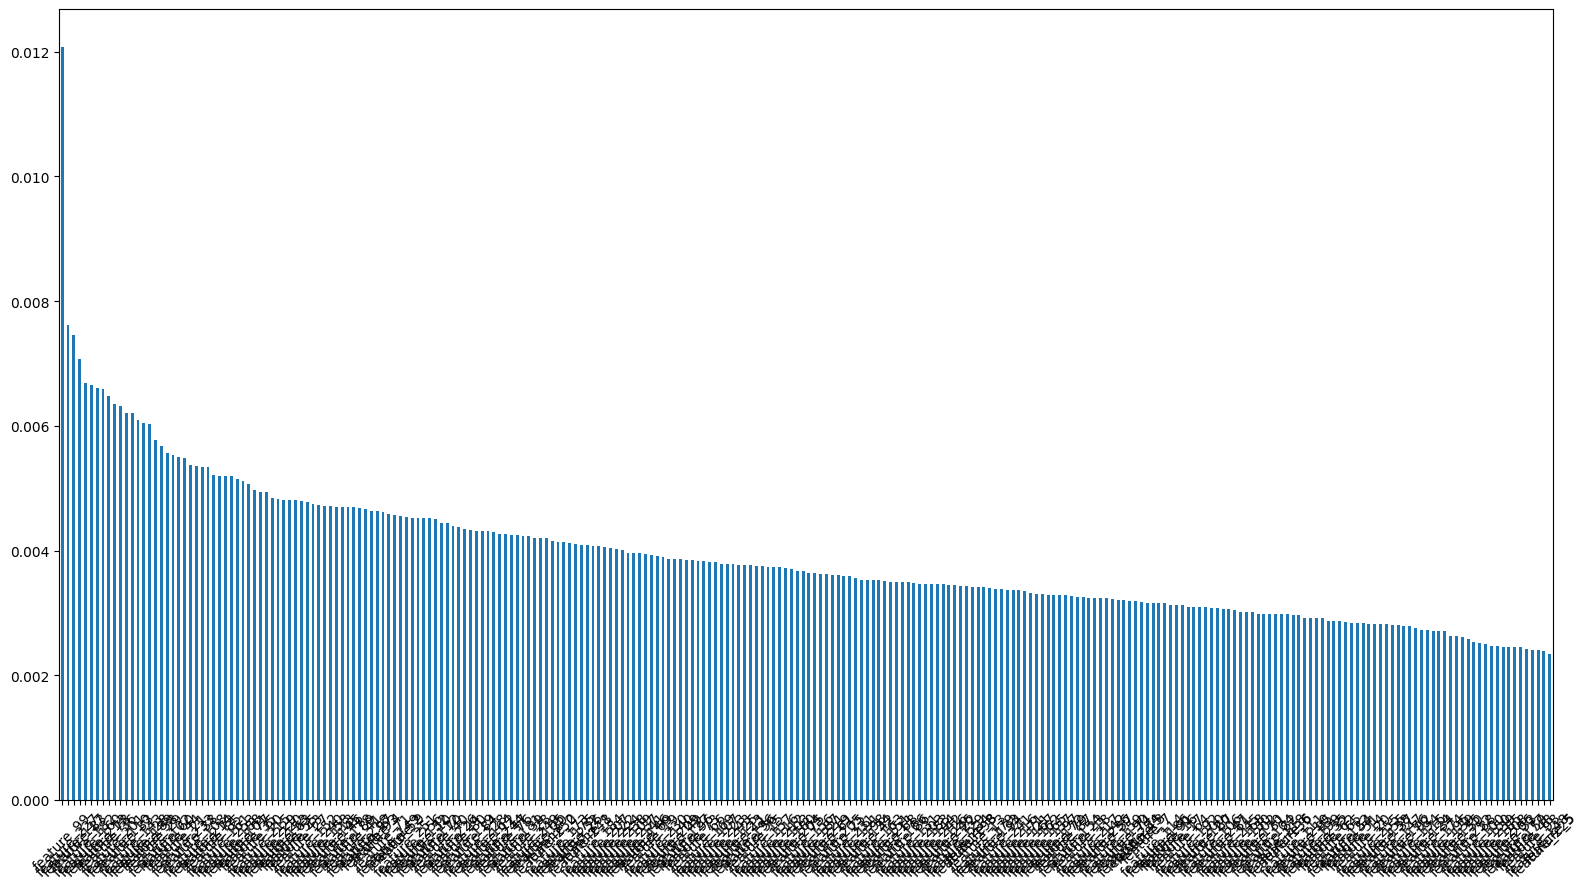

In [6]:
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

X = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y = train['label_4']

clf = RandomForestClassifier()
clf.fit(X, y)

importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

plt.tight_layout()
plt.show()


In [7]:
importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

threshold = 0.004

selected_features = f_importances[f_importances > threshold]

X_selected = X[selected_features.index]

In [20]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
def separate_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    model = svm.SVC(random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, X_test, y_train, y_test):
    print(f"Training score: {model.score(X_train, y_train)}")
    print(f"Testing score: {model.score(X_test, y_test)}")

def evaluate_model_detailed(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [22]:
X_train, X_test, y_train, y_test = separate_dataset(X_selected, y)

In [23]:
model4 = train_model(X_train, y_train)

In [24]:
evaluate_model(model4, X_train, X_test, y_train, y_test)

Training score: 0.9812161891404528
Testing score: 0.9741701729780271


In [25]:
evaluate_model_detailed(model4, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       306
           1       0.99      0.94      0.97       159
           2       0.98      0.88      0.93       435
           3       1.00      0.96      0.98       146
           4       1.00      0.91      0.95       134
           5       0.99      0.95      0.97       146
           6       0.97      1.00      0.98      5924
           7       1.00      0.91      0.95       298
           8       1.00      0.88      0.94       149
           9       0.99      0.95      0.97       139
          10       0.99      0.93      0.96       149
          11       1.00      1.00      1.00       141
          12       1.00      0.86      0.93       284
          13       1.00      1.00      1.00       146

    accuracy                           0.97      8556
   macro avg       0.99      0.94      0.96      8556
weighted avg       0.97      0.97      0.97      8556

Co

In [35]:
test = pd.read_csv("test.csv")

In [36]:
test = test[test.columns.difference(['label_1', 'label_2', 'label_3', 'label_4'])]

In [37]:
test = test[selected_features.index]

In [38]:
test['label_4'] = model4.predict(test)

In [39]:
test.head()

,feature_99,feature_227,feature_117,feature_83,feature_182,feature_160,feature_213,feature_78,feature_36,feature_201,...,feature_26,feature_248,feature_1,feature_184,feature_207,feature_222,feature_224,feature_238,feature_109,label_4
0,1.902969,0.977637,-0.446570,-0.790750,1.153078,1.752517,-1.408269,2.850119,1.681010,-0.379734,...,3.585334,-0.355608,-1.141206,1.045662,0.229153,-2.488485,-0.159058,0.271643,0.209527,6
1,0.387435,3.056122,1.738091,-0.412006,2.729514,2.191496,-1.542379,3.864089,3.269116,0.339954,...,5.167936,0.826741,-1.796767,1.983535,-0.266165,-0.338778,0.564460,1.295099,3.592686,6
2,0.928647,-0.087058,0.810390,-1.418212,3.501542,1.444194,-1.833679,3.511874,3.436413,-0.056286,...,5.076875,-0.243809,-1.388968,1.242937,0.243109,-1.267447,0.060489,-0.091886,1.565311,6
3,0.862430,1.110299,0.066740,0.303342,1.304783,2.423027,-2.025720,4.790571,3.524469,0.313341,...,3.094990,-0.632902,1.276844,0.305000,1.315077,-0.362242,0.439763,1.241378,2.189068,6
4,0.883026,3.408525,-0.789587,-1.439540,1.454729,0.831435,-1.785039,4.214573,1.471479,-0.351155,...,2.959776,-0.374313,-1.560815,2.359740,-0.547164,-1.654874,-1.568736,0.460157,0.316649,6


In [40]:
test.to_csv('test_with_predictions_label4.csv', index=False)